In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import altair as alt
alt.themes.enable('dark');

In [34]:
df_agg = pd.read_pickle('data_original.pkl')
print(df_agg.shape)
df_agg.head()

(525, 7)


,movie_name,director,year,jump_count,jump_scare_rating,imdb,runtime
0,10 Cloverfield Lane,Dan Trachtenberg,2016-01-01,8,2.5,7.3,103
1,28 Days Later,Danny Boyle,2003-01-01,10,3.0,7.6,113
2,28 Weeks Later,Juan Carlos Fresnadillo,2007-01-01,17,3.5,7.0,100
3,30 Days of Night,David Slade,2007-01-01,9,2.5,6.6,113
4,31,Rob Zombie,2016-01-01,8,2.5,5.8,103


In [35]:
df_ts = pd.read_pickle('data_w_timestamps.pkl')
print(df_ts.shape)
df_ts.head()

(3075, 12)


,year,scare_num,ts,type,ts_delta,movie_name,director,jump_count,jump_scare_rating,imdb,runtime,position
0,2016-01-01,0,1900-01-01 00:05:13,major,313,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.0506472
1,2016-01-01,1,1900-01-01 00:19:58,minor,1198,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.193851
2,2016-01-01,2,1900-01-01 00:38:15,minor,2295,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.371359
3,2016-01-01,3,1900-01-01 00:41:43,minor,2503,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.405016
4,2016-01-01,4,1900-01-01 01:15:08,minor,4508,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.72945


Here we can see that the number of movies and the number of jump scares has both been steadily increasing over the years. 

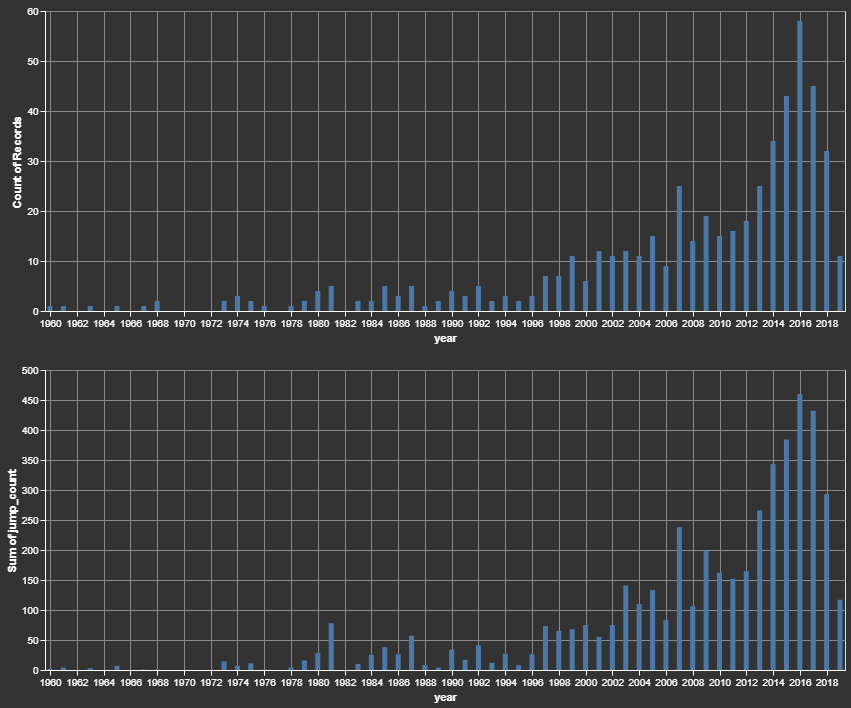

In [61]:
number_of_movies = alt.Chart(df_agg, width=800).mark_bar().encode(
    x=alt.X('year:T'),
    y=alt.Y('count(movie_name):Q')
)

number_of_scares = alt.Chart(df_agg, width=800).mark_bar().encode(
    x=alt.X('year:T'),
    y=alt.Y('sum(jump_count):Q')
)

number_of_movies & number_of_scares

The average jumpscare rating and movies' IMDB rating has been fairly consistent since 2002. 

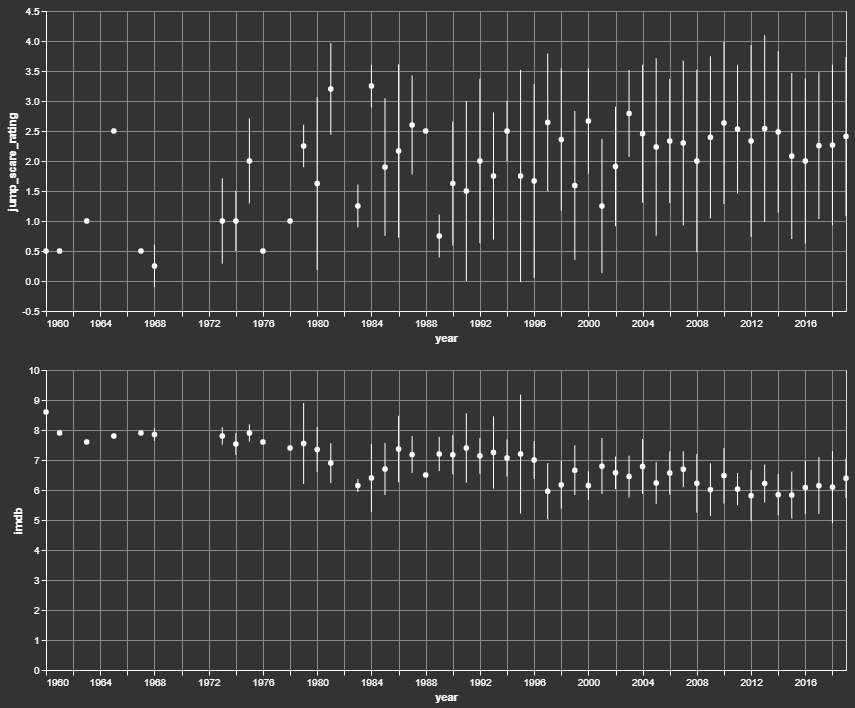

In [65]:
avgs = alt.Chart(df_agg, width=800).mark_circle(color='white').encode(
    x=alt.X('year:T'),
)
sds = alt.Chart(df_agg).mark_errorbar(extent='stdev', color='white').encode(
    x=alt.X('year:T'),
)
dot_plot = avgs + sds

avg_scare_rating = dot_plot.encode(y=alt.Y('jump_scare_rating:Q', aggregate='mean'))
avg_imdb = dot_plot.encode(y=alt.Y('imdb:Q', aggregate='mean'))

avg_scare_rating & avg_imdb

In [38]:
df_ts.head()

,year,scare_num,ts,type,ts_delta,movie_name,director,jump_count,jump_scare_rating,imdb,runtime,position
0,2016-01-01,0,1900-01-01 00:05:13,major,313,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.0506472
1,2016-01-01,1,1900-01-01 00:19:58,minor,1198,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.193851
2,2016-01-01,2,1900-01-01 00:38:15,minor,2295,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.371359
3,2016-01-01,3,1900-01-01 00:41:43,minor,2503,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.405016
4,2016-01-01,4,1900-01-01 01:15:08,minor,4508,10 Cloverfield Lane,Dan Trachtenberg,8,2.5,7.3,6180,0.72945


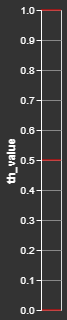

In [145]:
thresholds_data = pd.DataFrame([
    {"th_value": 1.0, "th": "End"},
    {"th_value": 0.5, "th": "Middle"},
    {"th_value": 0.0, "th": "Beginning"},
])
thresholds_rules = alt.Chart(thresholds_data).mark_rule(color='red').encode(
    y='th_value:Q', 
    opacity=alt.value(0.3)
)

thresholds_text = alt.Chart(thresholds_data).mark_text(
    align='left', dx=0, color='lightgrey'
).encode(
    alt.Y('th_value:Q'),
    text='th',
)
thresholds_rules

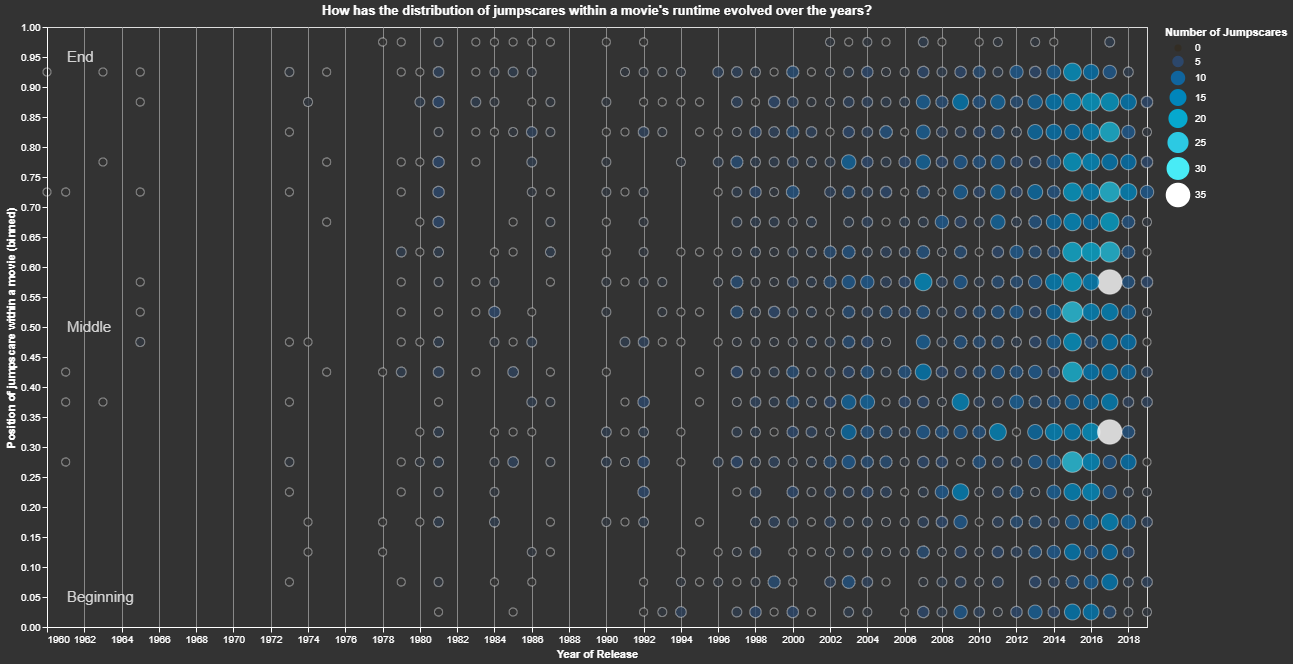

In [ ]:
thresholds_data = pd.DataFrame([
    {"th_value": 0.95, "th": "End"},
    {"th_value": 0.5, "th": "Middle"},
    {"th_value": 0.05, "th": "Beginning"},
])
thresholds_text = alt.Chart(thresholds_data).mark_text(align='left', dx=-530, color='lightgrey', size=15).encode(
    alt.Y('th_value:Q'),
    text='th',
)

evolution = alt.Chart(df_ts, width=1100, height=600).mark_circle(opacity=0.8, stroke='white', strokeWidth=0.5).encode(
    x=alt.X('year:T', axis=alt.Axis(title='Year of Release')),
    y=alt.Y('position:Q', bin=alt.Bin(maxbins=20), axis=alt.Axis(title='Position of jumpscare within a movie (binned)')),
    color=alt.Color('count()', scale=alt.Scale(scheme='darkblue'), legend=alt.Legend(title='Number of Jumpscares')),
    size=alt.Size('count()', scale=alt.Scale(range=[50,600]))
).properties(
    title='How has the distribution of jumpscares within a movie\'s runtime evolved over the years?'
)

evolution + thresholds_text

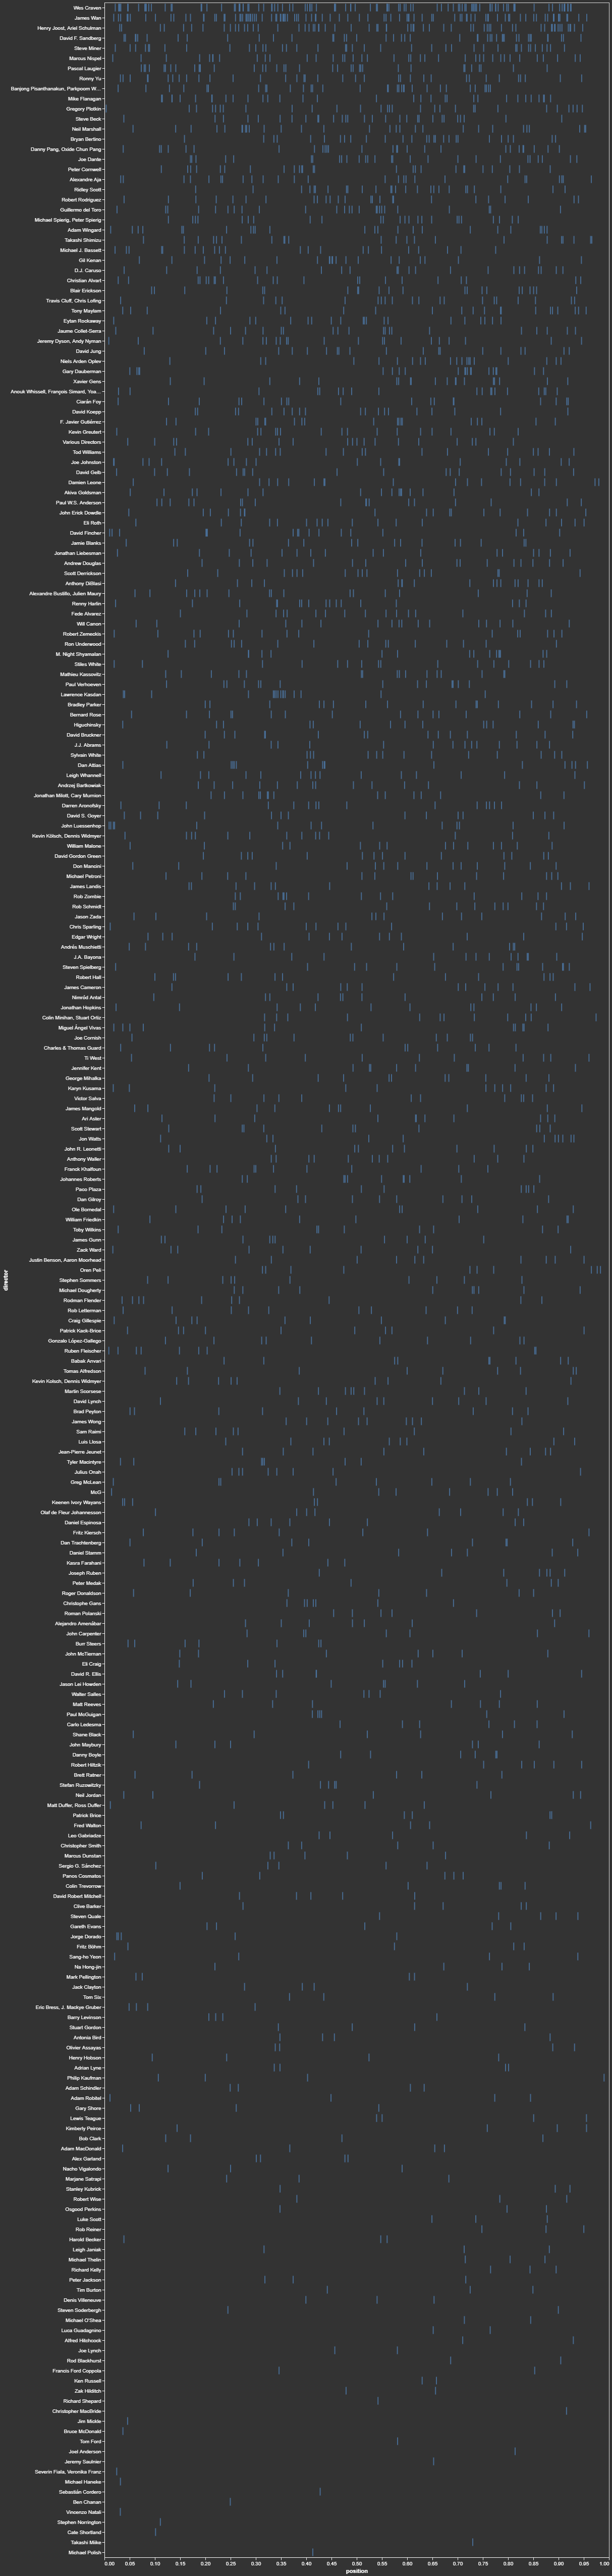

In [106]:
alt.Chart(df_ts, width=1000).mark_tick(thickness=2, opacity=0.8).encode(
    x=alt.X('position:Q', axis=alt.Axis(grid=False)),
    y=alt.Y('director:N', sort=alt.EncodingSortField(op='count', order='descending'))
#     y=alt.Y('director:N', sort=alt.EncodingSortField(field='jump_scare_rating', op='mean', order='descending'))
)